<a href="https://colab.research.google.com/github/ViniciusPezatti/Projeto_DNC/blob/main/Desafio_4_ML_Vinicius_Pezatti_vers%C3%A3o_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%pip install plotly

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR

from xgboost import XGBRegressor

from sklearn.preprocessing import scale, minmax_scale, power_transform

#Ler dados

In [ ]:
mkt = pd.read_csv('/content/MKT.csv')

# Visualizar dados

In [ ]:
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# Informações dos dados

In [ ]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Dados todos já em float64, não é preciso alterar

# Descrição dos dados

## item 1 para avaliação.

In [ ]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


* Não existe necessidade de limpeza dos dados, não existem linhas nulas
* Não é necessário eliminar colunas, todas contribuem para a solução do caso
* Não é necessário tratar dados, pois estão todos da forma ideal

In [ ]:
mkt_ordem = mkt.sort_values(by='sales', ascending=False)
mkt_ordem

,youtube,facebook,newspaper,sales
146,332.28,58.68,50.16,32.40
154,345.12,51.60,86.16,31.44
169,340.32,50.40,79.44,30.60
69,347.64,50.76,61.44,30.48
118,291.84,58.80,53.16,30.48
...,...,...,...,...
27,8.76,33.72,49.68,6.60
79,15.72,0.48,30.72,6.36
49,6.48,35.88,11.28,6.36
126,4.92,13.92,6.84,3.84


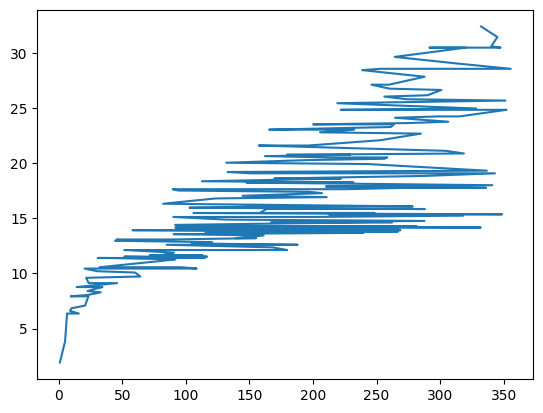

In [ ]:
plt.plot(mkt_ordem['youtube'],mkt_ordem['sales']);

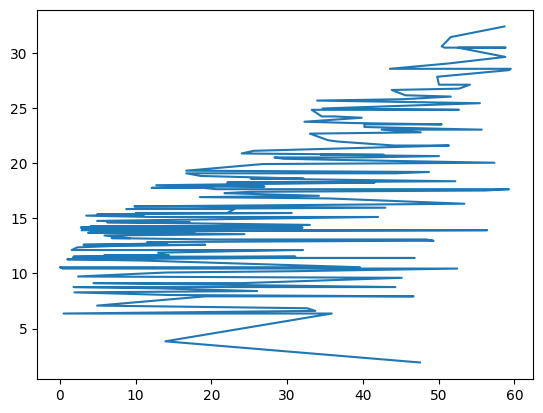

In [ ]:
plt.plot(mkt_ordem['facebook'],mkt_ordem['sales']);

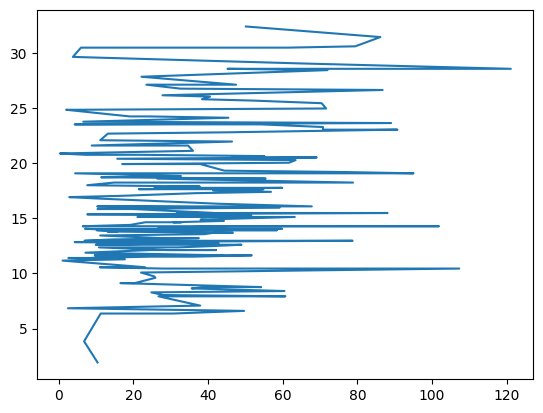

In [ ]:
plt.plot(mkt_ordem['newspaper'],mkt_ordem['sales']);

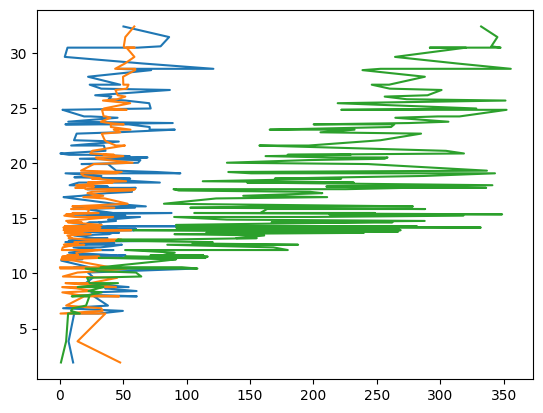

In [ ]:
plt.plot(mkt_ordem['newspaper'],mkt_ordem['sales']);
plt.plot(mkt_ordem['facebook'],mkt_ordem['sales']);
plt.plot(mkt_ordem['youtube'],mkt_ordem['sales']);

##Impresões iniciais
###Por esta análise é possível verificar que aumento das vendas está ligado aos investimentos feitos.
###O "NEWSPAPER" tem menor influência haja visto que o aumento de investimento não melhora a venda, mas o "FACEBOOK" e o "YOUTUBE" tem ligação direta.
###Basta entender melhor se investir menos em Youtube e mais em Facebook irá manter o crescimento, haja visto que os valores a serem investidos em Facebook são menores, e gastar menos para trazer maiores resultados seria o ideal, mas é uma análise e teste a ser feito.

#Análise Exploratória

In [ ]:
fig = px.box(mkt, x="sales")
fig.update_traces(line_color="green")

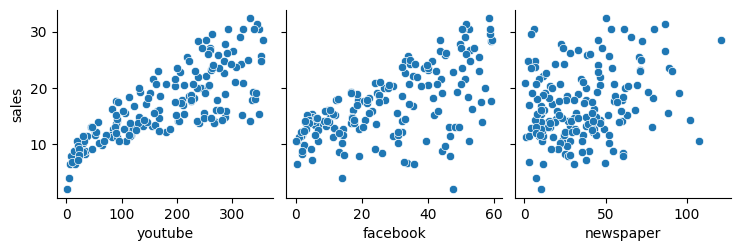

In [ ]:
sns.pairplot(mkt, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales");

## De acorodo com com PAIRPLOT podemos analisar que:

*   Youtube  - tem influência no crescimento das vendas gastando mais;
*   Facebook  - tem influência no crescimento das vendas gastando menos;
*   Newspaper  - não mostra nenhuma influência no crescimento das vendas;





## Retirar o NEWSPAPER da análise geral.

In [ ]:
mkt.drop(['newspaper'], axis=1, inplace=True)
mkt.head()

,youtube,facebook,sales
0,84.72,19.20,12.60
1,351.48,33.96,25.68
2,135.48,20.88,14.28
3,116.64,1.80,11.52
4,318.72,24.00,20.88


In [ ]:
mkt.corr()

,youtube,facebook,sales
youtube,1.000000,0.086538,0.782030
facebook,0.086538,1.000000,0.602918
sales,0.782030,0.602918,1.000000


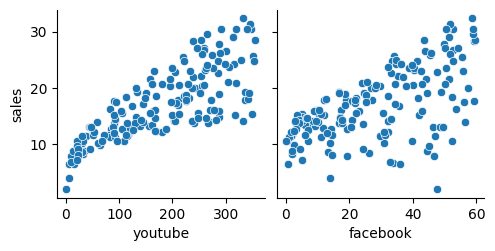

In [ ]:
sns.pairplot(mkt, x_vars=['youtube', 'facebook'], y_vars="sales");

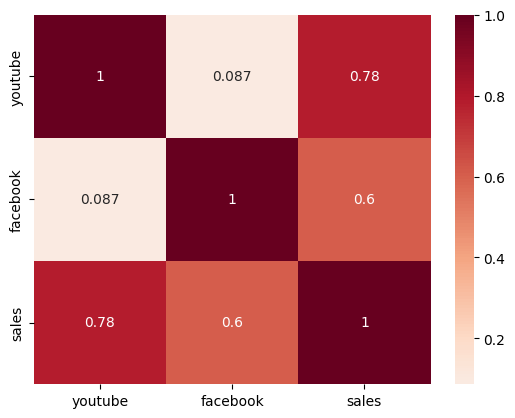

In [ ]:
sns.heatmap(mkt.corr(), cmap='RdBu_r', center=0, annot=True);

# MODELAGEM

##Declarações para treino

In [ ]:
X = mkt[['facebook', 'youtube']]

Y = mkt[["sales"]]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 2)
(52, 2)
(119, 1)
(52, 1)


#Tecnica 1: Regressão Linear`

In [ ]:
regLinear_mkt = LinearRegression()

In [ ]:
regLinear_mkt.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_linear = regLinear_mkt.predict(X_test)

#Calculo coeficiente R²



In [ ]:
r_Linear = r2_score(Y_test, y_pred_linear)
print("R² Linear:", r_Linear)

R² Linear: 0.8824796927714542


## Análise de erro por MEAN SQUARE ERROR (MSE)

In [ ]:
MSE_Linear = mean_squared_error(Y_test, y_pred_linear)

In [ ]:
print("MSE_Linear:",MSE_Linear)
print("RMSE_Linear:", np.sqrt(MSE_Linear))

MSE_Linear: 4.697199826159456
RMSE_Linear: 2.1673024307095345


#Tecnica 2: SVR

In [ ]:
regSVR_mkt = SVR()
regSVR_mkt.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
ySVR = regSVR_mkt.predict(X_test)

In [ ]:
MSESVR = mean_squared_error(Y_test, ySVR)

In [ ]:
print("MSE_SVR:",MSESVR)
print("RMSE_SVR:", np.sqrt(MSESVR))

MSE_SVR: 9.165273423324205
RMSE_SVR: 3.0274202587886943


In [ ]:
r_SVR = r2_score(Y_test, ySVR)
print("R² SRV:", r_SVR)

R² SRV: 0.7706919466052706


# Técnica 3: Decision Tree Regression (XG Boost)

In [ ]:
regXGB_mkt = XGBRegressor()
regXGB_mkt.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
yXGB = regXGB_mkt.predict(X_test)

In [ ]:
MSE_XGB = mean_squared_error(Y_test, yXGB)

In [ ]:
print("MSE_XGB:",MSE_XGB)
print("RMSE_XGB:", np.sqrt(MSE_XGB))

MSE_XGB: 1.3854883706396115
RMSE_XGB: 1.1770677001088814


In [ ]:
r_XGB = r2_score(Y_test, yXGB)
print("R² XGB:", r_XGB)

R² XGB: 0.9653361523875656


#Comparando os RMSE

In [ ]:
print("RMSE_Linear:", np.sqrt(MSE_Linear))
print("RMSE_SVR:", np.sqrt(MSESVR))
print("RMSE_XGB:", np.sqrt(MSE_XGB))
print()
print("R² Linear:", r_Linear)
print("R² SRV:", r_SVR)
print("R² XGB:", r_XGB)

RMSE_Linear: 2.1673024307095345
RMSE_SVR: 3.0274202587886943
RMSE_XGB: 1.1770677001088814

R² Linear: 0.8824796927714542
R² SRV: 0.7706919466052706
R² XGB: 0.9653361523875656


## Verificado que o erro com o XG Boost Regressor pelo RMSE foi o menor entre os 3 casos analisados
## Verificado que o erro com o SRV pelo R² foi o menor entre os 3 casos analisados